**Addestramento con Scikit-Learn**

Preparazione dei dati: 


-divisione in training set (80%) e test set (20%)


-scala dei dati

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

training = pd.read_csv('data/training_c.csv')

X = training.drop('RiskLevel', axis=1)
y = training['RiskLevel']
train_size=0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-train_size, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
training

FileNotFoundError: [Errno 2] No such file or directory: 'training_c.csv'

Addestriamo il classificatore utilizzando il modello **Gaussian Naive Bayes**. Il modello calcola:

la media e la deviazione standard di ciascuna caratteristica per ogni classe; 

la probabilità di ciascuna classe.

In [2]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

Valutazione delle prestazioni del Gaussian Naive Bayes

In [3]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza: {accuracy:.4f}")

Accuratezza: 0.6337


Valutazione delle prestazioni del *Gaussian Naive Bayes* con K-Fold Cross-Validation,
k=5

In [4]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

0.5906605585931728

**Curva di Validazione per il Gaussian Naive Bayes**

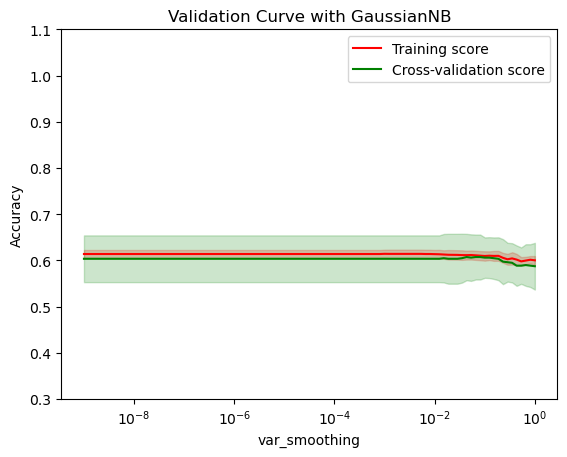

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Inizializza il modello GaussianNB
model = GaussianNB()

# Definisci il range per il parametro var_smoothing
param_range = np.logspace(-9, 0, 100)  # Da 10^-9 a 10^0

# Calcola le curve di validazione
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="var_smoothing", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1
)

# Calcola la media e la deviazione standard
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Traccia il grafico
plt.title("Validation Curve with GaussianNB")
plt.xlabel("var_smoothing")
plt.ylabel("Accuracy")
plt.ylim(0.3, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.xscale("log")
plt.legend(loc="best")
plt.show()


Addestriamo il modello con il **KNN (k-Nearest Neighbours)**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
k = 1  # Numero di vicini da considerare
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Previsioni sul test set
y_pred = model.predict(X_test)


Prestazioni sul test set


In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza: {accuracy:.4f}")

NameError: name 'accuracy_score' is not defined

Valutazione delle prestazioni del *KNN* con K-Fold Cross-Validation,
k=5

In [8]:

cross_val_score(model, X, y, cv=5).mean()

0.8315550958080884

In [5]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_train, y_train)
print(f"Silhouette Score: {silhouette_avg:.4f}")

NameError: name 'X_train' is not defined